In [3]:
import geopandas as gpd

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
usa = world.loc[world['name'] == 'United States of America']
# usa = world.loc[world['continent'] == 'North America']

In [6]:
states = gpd.read_file('datasets/US_states/cb_2018_us_state_5m.shp')

In [7]:
# states_to_hide = ['Alaska', 'Hawaii']
# states = states.loc[~states['NAME'].isin(states_to_hide)]
# states.head()

In [8]:
states['coords'] = states['geometry'].apply(lambda x: x.representative_point().coords[:])
states['coords'] = [coords[0] for coords in states['coords']]

In [9]:
unis = pd.read_csv('datasets/ipeds_2021.csv', encoding_errors='ignore')
unis.head(2)

,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,-2,26620,1,290,-2,1089,Madison County,105,-86.568502,34.783368
1,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,101050,13820,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697


In [10]:
unis_gdf = gpd.GeoDataFrame(unis,
                            geometry=gpd.points_from_xy(unis['LONGITUD'], unis['LATITUDE']))
unis_gdf.crs = {'init': 'epsg:4326'}
unis_gdf.to_crs(epsg=32630).head()

/Users/shielasandoval/Geospatial/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,geometry
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,26620,1,290,-2,1089,Madison County,105,-86.568502,34.783368,POINT (-6798080.364 8981893.043)
1,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,13820,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,POINT (-7048696.752 8970909.065)
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,...,33860,1,388,-2,1101,Montgomery County,102,-86.174010,32.362609,POINT (-7250929.492 8821211.043)
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Darren Dawson,...,26620,1,290,-2,1089,Madison County,105,-86.640449,34.724557,POINT (-6811294.036 8990889.518)
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,...,33860,1,388,-2,1101,Montgomery County,107,-86.295677,32.364317,POINT (-7255069.109 8841716.797)


In [11]:
synth_top_unis = [
    'New York University',
    'Boston University',
    'University of Southern California',
    'Cornell University',
    'Northeastern University',
    'University of Michigan',
    'University of Pennsylvania',
    'Columbia University',
    'Stanford University',
    'Brown University',
    'Yale University',
    'Northwestern University',
    'Syracuse University',
    'Princeton University',
    'California Institute of Technology',
    'University of Georgia',
]

In [12]:
# filter unis to top unis
top_unis = unis_gdf.loc[(unis_gdf['INSTNM'].isin(synth_top_unis)) | (unis_gdf['IALIAS'].isin(synth_top_unis))]

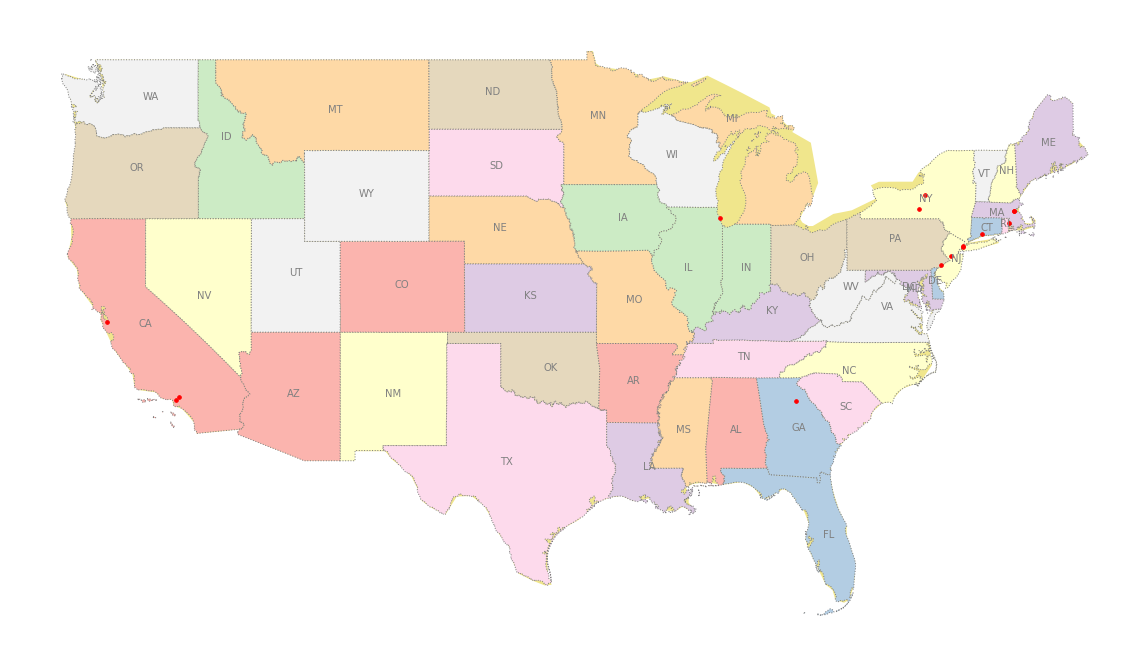

In [19]:
base = usa.plot(figsize=(20,15), color='khaki')
base.axis('off')

states.plot(ax=base, edgecolor='grey', linestyle=':', column='NAME', cmap='Pastel1')

minx, miny, maxx, maxy = usa.total_bounds
base.set_xlim(minx+44, maxx+2)
base.set_ylim(miny+4, maxy-20)

# unis_gdf.plot(color='cornsilk', markersize=2, ax=base)
top_unis.plot(color='red', markersize=13, ax=base)

for idx, row in states.iterrows():
   plt.annotate(text=row['STUSPS'],
                xy=row['coords'],
                horizontalalignment='center',
                color='grey')
